In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, metrics, base, linear_model, model_selection, datasets
from matplotlib import colors
from ipywidgets import interact

In [7]:
cm = colors.ListedColormap(['red', 'green', 'cyan', 'yellow', 'orange', 'brown', 'blue', 'purple', 'pink'])

In [8]:
np.random.seed(42)
X = np.random.randn(9, 2)
# y = X @ [20, -35]
y = [10, 20, 30, 40, 50, 60, 70, 80, 90]

## Minkowski Mesafeleri

Farkli $p$ degerleri icin birim cemberi asagida gorebilirsiniz:

In [10]:
@interact
def minviz(p=(0.1, 5, 0.1)):
    # p = 0.6
    xx, yy = np.meshgrid(*[np.linspace(-2, 2, 200)] * 2)
    zz = (np.abs(np.array([xx, yy]))**p).sum(axis=0)**(1/p)
    plt.contourf(xx, yy, (np.abs(zz - 1.0) < 0.1), levels=100)
    plt.colorbar()
    plt.scatter(0, 0, color='red')

interactive(children=(FloatSlider(value=2.5000000000000004, description='p', max=5.0, min=0.1), Output()), _do…

### K=N icin KNN tahminleri (mesafe agirlikli)

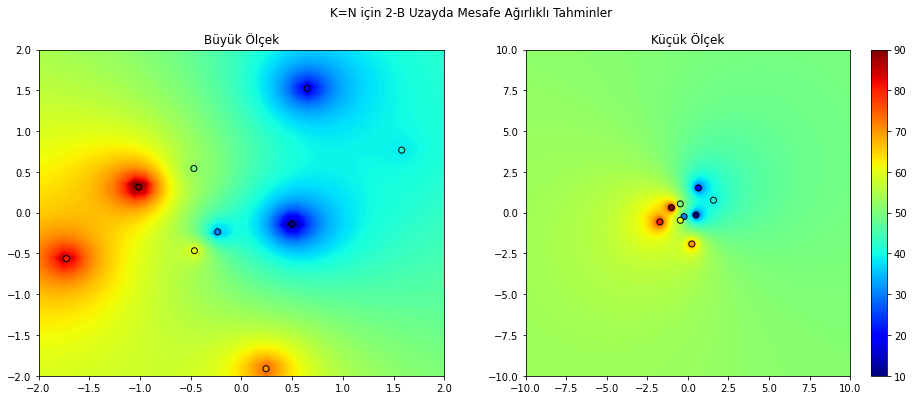

In [11]:
m = neighbors.KNeighborsRegressor(n_neighbors=9, weights='distance', p=2).fit(X, y)

xx, yy = np.meshgrid(*[np.linspace(-10, 10, 200)] * 2)
zz = m.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.contourf(xx, yy, zz, cmap='jet', levels=500)
plt.scatter(*X.T, c=y, edgecolors='black', cmap='jet')
# plt.colorbar()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Büyük Ölçek")


xx, yy = np.meshgrid(*[np.linspace(-10, 10, 200)] * 2)
zz = m.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
plt.subplot(122)
plt.contourf(xx, yy, zz, levels=500, cmap='jet')
plt.scatter(*X.T, c=y, edgecolors='black', cmap='jet')
plt.colorbar()
# plt.scatter(-1, 1.5, edgecolors="black", color="black", label="yeni örnek")
# plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title("Küçük Ölçek")
# plt.scatter(-1, 1.5, edgecolors="black", color="black", label="yeni örnek")
# plt.legend()
plt.suptitle("K=N için 2-B Uzayda Mesafe Ağırlıklı Tahminler");

### K=N icin KNN tahminleri (uniform)

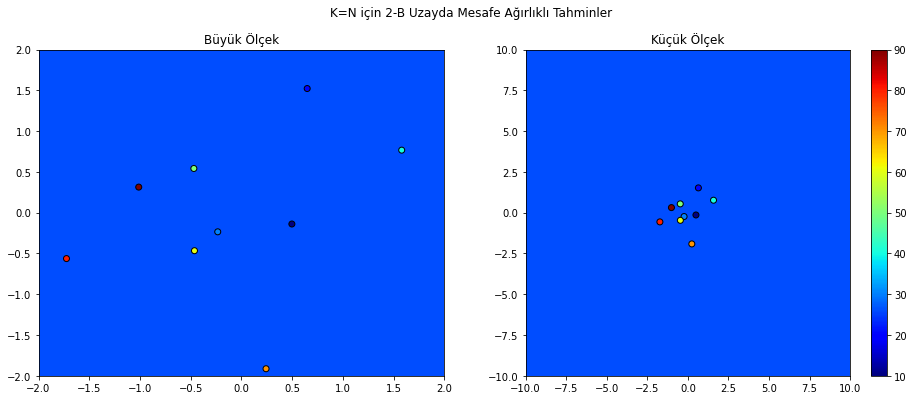

In [12]:
m = neighbors.KNeighborsRegressor(n_neighbors=9, weights='uniform', p=2).fit(X, y)

xx, yy = np.meshgrid(*[np.linspace(-10, 10, 200)] * 2)
zz = m.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.contourf(xx, yy, zz, cmap='jet', levels=500)
plt.scatter(*X.T, c=y, edgecolors='black', cmap='jet')
# plt.colorbar()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Büyük Ölçek")


xx, yy = np.meshgrid(*[np.linspace(-10, 10, 200)] * 2)
zz = m.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
plt.subplot(122)
plt.contourf(xx, yy, zz, levels=500, cmap='jet')
plt.scatter(*X.T, c=y, edgecolors='black', cmap='jet')
plt.colorbar()
# plt.scatter(-1, 1.5, edgecolors="black", color="black", label="yeni örnek")
# plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title("Küçük Ölçek")
# plt.scatter(-1, 1.5, edgecolors="black", color="black", label="yeni örnek")
# plt.legend()
plt.suptitle("K=N için 2-B Uzayda Mesafe Ağırlıklı Tahminler");

## Voronoi diyagramlari

K = 1 icin, uzayi noktalara yakinliklarina gore bolup, bunu gorsellestirebiliriz:

### Oklid mesafesi

(-20.0, 20.0)

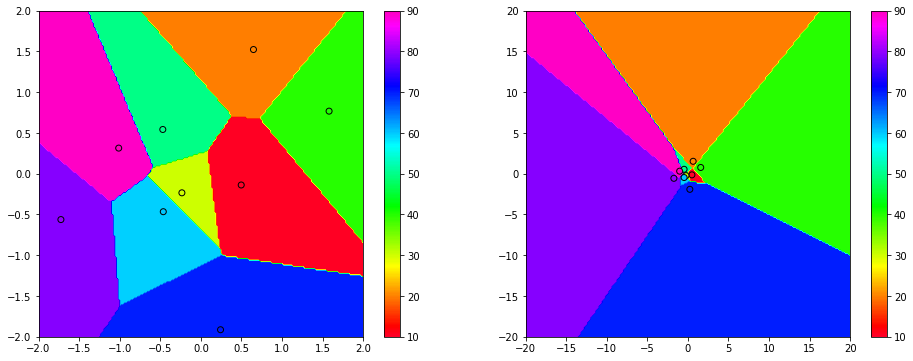

In [13]:
m = neighbors.KNeighborsRegressor(n_neighbors=1).fit(X, y)

xx, yy = np.meshgrid(*[np.linspace(-2, 2, 200)] * 2)
zz = m.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.contourf(xx, yy, zz, cmap='gist_rainbow', levels=100)
plt.scatter(*X.T, c=y, edgecolors='black', cmap='gist_rainbow')
plt.colorbar()

xx, yy = np.meshgrid(*[np.linspace(-20, 20, 200)] * 2)
zz = m.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
plt.subplot(122)
plt.contourf(xx, yy, zz, levels=100, cmap='gist_rainbow')
plt.scatter(*X.T, c=y, edgecolors='black', cmap='gist_rainbow')
plt.colorbar()
# plt.scatter(-1, 1.5, edgecolors="black", color="black", label="yeni örnek")
# plt.legend()
plt.xlim(-20, 20)
plt.ylim(-20, 20)
# plt.scatter(-1, 1.5, edgecolors="black", color="black", label="yeni örnek")
# plt.legend()

### Manhattan mesafesi

(-20.0, 20.0)

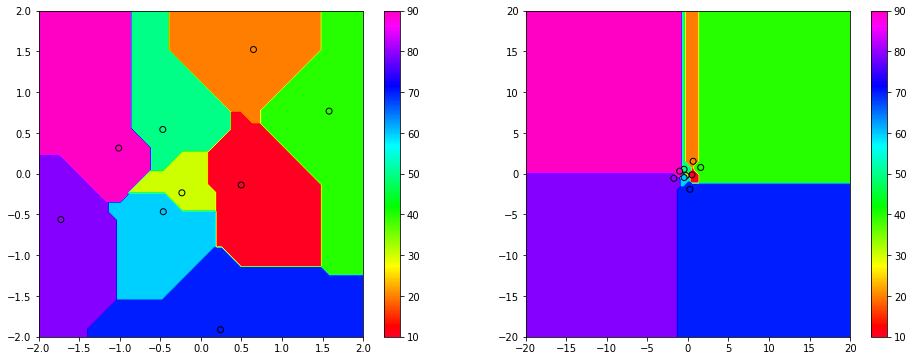

In [14]:
m = neighbors.KNeighborsRegressor(n_neighbors=1, p=1).fit(X, y)

xx, yy = np.meshgrid(*[np.linspace(-2, 2, 200)] * 2)
zz = m.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.contourf(xx, yy, zz, cmap='gist_rainbow', levels=100)
plt.scatter(*X.T, c=y, edgecolors='black', cmap='gist_rainbow')
plt.colorbar()

xx, yy = np.meshgrid(*[np.linspace(-20, 20, 200)] * 2)
zz = m.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
plt.subplot(122)
plt.contourf(xx, yy, zz, levels=100, cmap='gist_rainbow')
plt.scatter(*X.T, c=y, edgecolors='black', cmap='gist_rainbow')
plt.colorbar()
# plt.scatter(-1, 1.5, edgecolors="black", color="black", label="yeni örnek")
# plt.legend()
plt.xlim(-20, 20)
plt.ylim(-20, 20)
# plt.scatter(-1, 1.5, edgecolors="black", color="black", label="yeni örnek")
# plt.legend()

### Minkowski (p=1000)

In [15]:
m = neighbors.KNeighborsRegressor(n_neighbors=1, p=1000).fit(X, y)

(-20.0, 20.0)

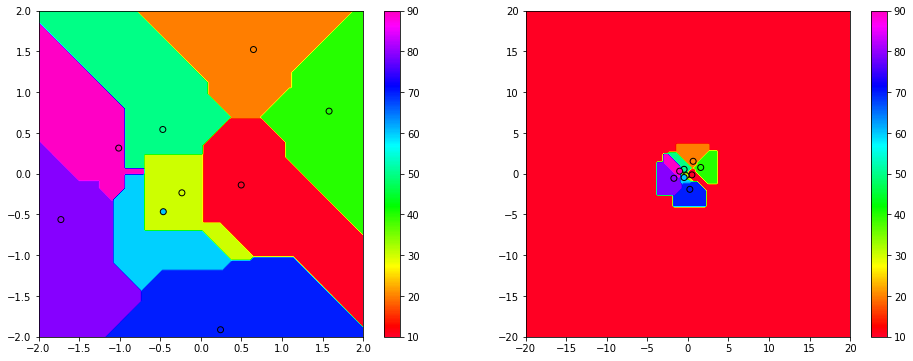

In [16]:
xx, yy = np.meshgrid(*[np.linspace(-2, 2, 200)] * 2)
zz = m.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.contourf(xx, yy, zz, cmap='gist_rainbow', levels=100)
plt.scatter(*X.T, c=y, edgecolors='black', cmap='gist_rainbow')
plt.colorbar()

xx, yy = np.meshgrid(*[np.linspace(-20, 20, 200)] * 2)
zz = m.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
plt.subplot(122)
plt.contourf(xx, yy, zz, levels=100, cmap='gist_rainbow')
plt.scatter(*X.T, c=y, edgecolors='black', cmap='gist_rainbow')
plt.colorbar()
# plt.scatter(-1, 1.5, edgecolors="black", color="black", label="yeni örnek")
# plt.legend()
plt.xlim(-20, 20)
plt.ylim(-20, 20)
# plt.scatter(-1, 1.5, edgecolors="black", color="black", label="yeni örnek")
# plt.legend()

### Kosinus mesafeleri

Kosinus mesafelerini hesaplamak icin `sklearn`un `pairwise.cosine_distances` fonksiyonunu kullanabiliriz.?

In [17]:
metrics.pairwise.cosine_distances(X[0].reshape(1, -1), X[1].reshape(1, -1))

array([[0.86976278]])

In [18]:
m = neighbors.KNeighborsRegressor(n_neighbors=1,
                                  metric=lambda x,y: metrics.pairwise.cosine_distances(x.reshape(1, -1), y.reshape(1, -1))).fit(X, y)

(-20.0, 20.0)

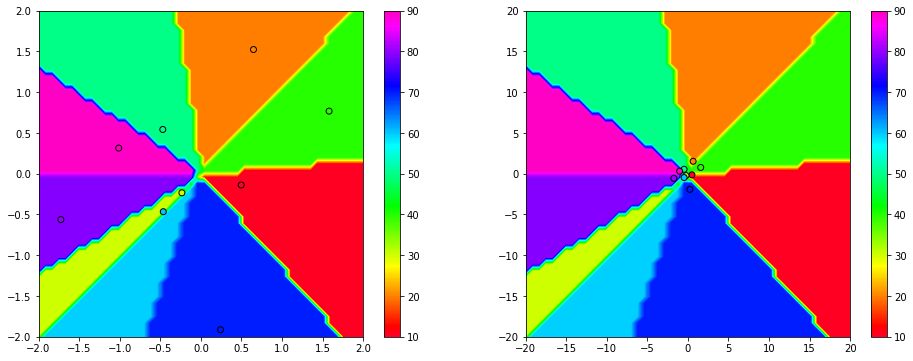

In [19]:
xx, yy = np.meshgrid(*[np.linspace(-2, 2, 50)] * 2)
zz = m.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.contourf(xx, yy, zz, cmap='gist_rainbow', levels=100)
plt.scatter(*X.T, c=y, edgecolors='black', cmap='gist_rainbow')
plt.colorbar()

xx, yy = np.meshgrid(*[np.linspace(-20, 20, 50)] * 2)
zz = m.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
plt.subplot(122)
plt.contourf(xx, yy, zz, levels=100, cmap='gist_rainbow')
plt.scatter(*X.T, c=y, edgecolors='black', cmap='gist_rainbow')
plt.colorbar()
# plt.scatter(-1, 1.5, edgecolors="black", color="black", label="yeni örnek")
# plt.legend()
plt.xlim(-20, 20)
plt.ylim(-20, 20)
# plt.scatter(-1, 1.5, edgecolors="black", color="black", label="yeni örnek")
# plt.legend()

Oklid mesafesinden uzaklasip acisal benzerlik gozetmeye basladigimiza dikkat ediniz.

## Onyargilar

Mesafe hesaplamasina tum feature'lar katildigi icin, KNN'in bias'larindan biri de *tum feature'larin esit oneme sahip olmasi* olacaktir.

Asagidaki mini-dataset uzerinde bu durumu gozlemleyebilirsiniz.
- `Sahip Olduğu Gayrimenkul Sayısı` gibi elimizde onemli bir feature var.
    - Dikkat ederseniz, $(Kart\ harcama\ miktari) = y = 1000 (sahip\ oldugu\ gayrimenkul\ sayisi)$
- Ek olarak, `Dün Akşam Kac Tavuk Yedi` gibi gereksiz bir feature'imiz var. 

In [66]:
import pandas as pd

In [67]:
df = pd.DataFrame({"Sahip Olduğu Gayrimenkul Sayısı": [1, 3, 4, 5, 6], "Dün Akşam Kac Tavuk Yedi": [4, 2, 0, 0, 3], "Kart Harcama Miktarı": [10000, 30000, 40000, 50000, '?']})

In [68]:
df

,Sahip Olduğu Gayrimenkul Sayısı,Dün Akşam Kac Tavuk Yedi,Kart Harcama Miktarı
0,1,4,10000
1,3,2,30000
2,4,0,40000
3,5,0,50000
4,6,3,?


4 numarali ornek icin en yakin komsuyu tespit edip tahmin yapalim:

In [70]:
sacmamodel = neighbors.KNeighborsRegressor(n_neighbors=1)

In [71]:
sacmamodel.fit(df.iloc[:-1,:-1], df.iloc[:-1,-1])

KNeighborsRegressor(n_neighbors=1)

In [73]:
sacmamodel.predict(df.iloc[-1:,:-1])

array([30000.0], dtype=object)

Secilen komsu:

|    |   Sahip Olduğu Gayrimenkul Sayısı |   Dün Akşam Kac Tavuk Yedi |   Kart Harcama Miktarı |
|---:|----------------------------------:|---------------------------:|-----------------------:|
|  1 |                                 3 |                          2 |                  30000 |

Ciktiya hicbir etkisi olmamasina ragmen gereksiz feature'imiz karari ciddi bicimde etkiledi.

### Degiskenlerin olcekleri

Tum feature'larin esit oneme sahip olmasina ek olarak, buyuk olcekte degisen feature'lar mesafe metrigini baskilayabilir.

Bunun icin asagidaki mini-dataseti inceleyelim:

- `Ekmege odenen para`: TL cinsinden, yuzbinler olceginde degismekte
- `Gayrimenkul Sayısı`: Birim, birler olceginde degismekte

In [77]:
df = pd.DataFrame({'Ekmek': [100e3, 200e3, 400e3], 'Gayrimenkul': [1, 2, 4]})

In [80]:
df

,Ekmek,Gayrimenkul
0,100000.0,1
1,200000.0,2
2,400000.0,4


Yukaridaki veri setinden, asagida 3 numarali indekse ekledigimiz ornek icin en yakin komsuyu bulalim:

In [81]:
df.T.assign(**{"3":[200e3, 6]}).T.astype(int)

,Ekmek,Gayrimenkul
0,100000,1
1,200000,2
2,400000,4
3,200000,6


(0.85, 4.15, 0.75, 6.25)

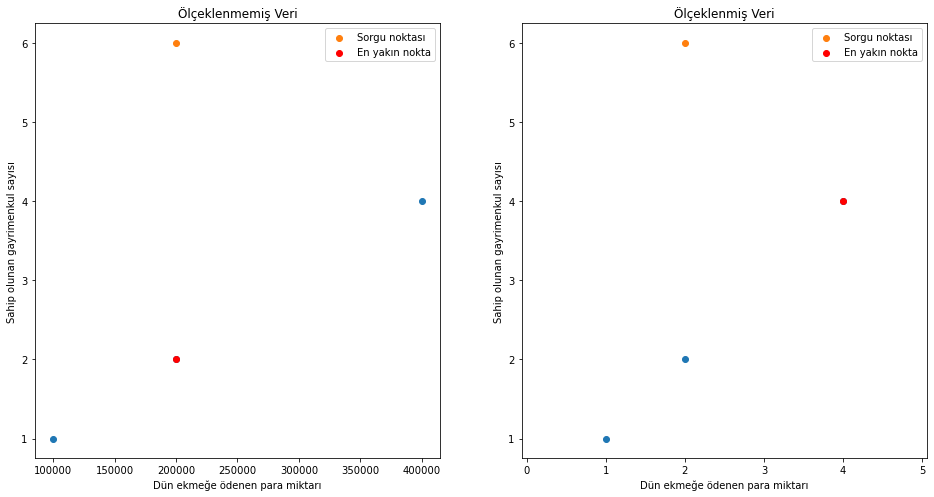

In [82]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.scatter(df['Ekmek'], df['Gayrimenkul'])
plt.scatter(200e3, 6, label="Sorgu noktası")
plt.scatter(200e3, 2, color="red", label="En yakın nokta")
plt.xlabel('Dün ekmeğe ödenen para miktarı')
plt.ylabel("Sahip olunan gayrimenkul sayısı")
plt.title("Ölçeklenmemiş Veri")
# plt.axis('equal')
plt.legend()
plt.subplot(122)
plt.scatter(df['Ekmek']/100e3, df['Gayrimenkul'])
plt.scatter(2, 6, label="Sorgu noktası")
plt.scatter(4, 4, color="red", label="En yakın nokta")
plt.xlabel('Dün ekmeğe ödenen para miktarı')
plt.ylabel("Sahip olunan gayrimenkul sayısı")
plt.title("Ölçeklenmiş Veri")
plt.legend()
plt.axis("equal")


Soldaki ve sagdaki gorselleri incelediginizde, 
- ilk gorselde mesafenin tamamen `Ekmek` degiskeni tarafindan domine edildigini,
- ikinici gorselde ise olceklemeden sonra, `Gayrimenkul Sayısı` degiskeninin de komsu bulmada etkin rol oynadigini

goruyoruz.

### Komsu sayisi: K parametresinin etkisi

Asagidaki sentetik datasette komsu sayisi ile bias/variance dengesinin nasil degistigini gozlemleyecegiz:

In [90]:
np.random.seed(42)
N = 120
Xlin = np.random.uniform(-8, 8, size=(N, 1))
ylin = (Xlin**2 * 3).ravel() + np.random.randn(Xlin.shape[0]) * 20
Xlin_test = np.random.uniform(-8, 8, size=(N, 1))
ylin_test = (Xlin_test**2 * 3).ravel() + np.random.randn(Xlin_test.shape[0]) * 20

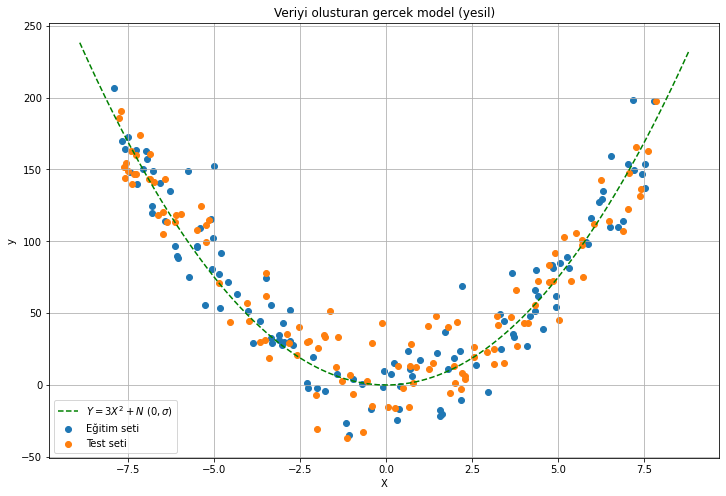

In [93]:
plt.figure(figsize=(12, 8))
plt.scatter(Xlin, ylin, label='Eğitim seti')
plt.scatter(Xlin_test, ylin_test, label='Test seti')
plt.xlabel("X")
plt.ylabel("y")
t = np.linspace(Xlin.min() - 1, Xlin.max() + 1, 1000)
plt.plot(t, 3*t**2, '--',color='green', label='$Y=3X^2 + N~(0, \sigma)$')
plt.legend()
plt.grid()
plt.title("Veriyi olusturan gercek model (yesil)");


Uc noktalar, K=1 ve K=N icin modelin tahminlerini incelersek:

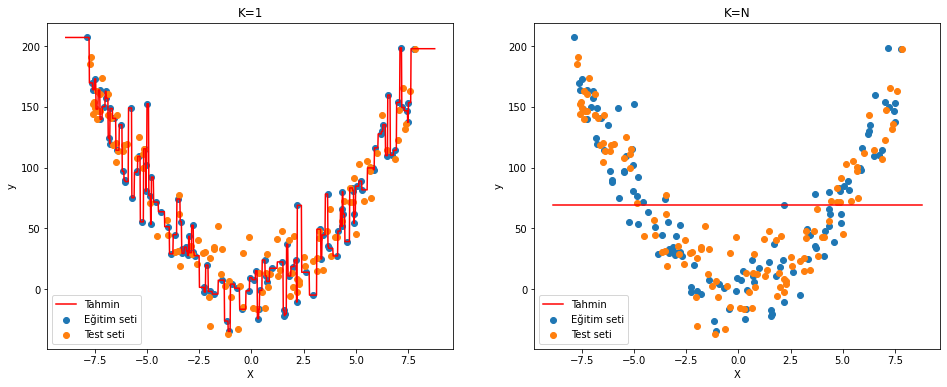

In [94]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.scatter(Xlin, ylin, label='Eğitim seti')
plt.scatter(Xlin_test, ylin_test, label='Test seti')
plt.title("K=1")
plt.xlabel("X")
plt.ylabel("y")
t = np.linspace(Xlin.min() - 1, Xlin.max() + 1, 1000)
mlin = neighbors.KNeighborsRegressor(n_neighbors=1).fit(Xlin, ylin)
plt.plot(t, mlin.predict(t.reshape(-1,1)), color='red', label="Tahmin")
plt.legend()
plt.subplot(122)
plt.scatter(Xlin, ylin, label='Eğitim seti')
plt.scatter(Xlin_test, ylin_test, label='Test seti')
t = np.linspace(Xlin.min() - 1, Xlin.max() + 1, 1000)
mlin = neighbors.KNeighborsRegressor(n_neighbors=Xlin.shape[0]).fit(Xlin, ylin)
plt.plot(t, mlin.predict(t.reshape(-1,1)), color='red', label='Tahmin')
plt.title("K=N")
plt.xlabel("X")
plt.ylabel("y")
plt.legend();


Aradaki K degerleri icin train ve test skorlari nasil degismektedir? CV ile inceleyelim:

In [105]:
komsu_sayilari = np.arange(1,12,1)
vld = model_selection.GridSearchCV(
    neighbors.KNeighborsRegressor(),
    {'n_neighbors': komsu_sayilari},
    cv=model_selection.ShuffleSplit(n_splits=30, random_state=42), 
#     scoring=metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False),
    return_train_score=True
    ).fit(X, y)

Text(0.5, 1.0, 'Eğitim Seti Performansı')

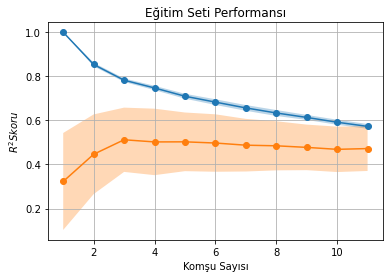

In [106]:
plt.plot(komsu_sayilari, vld.cv_results_['mean_train_score'], '-o')
plt.plot(komsu_sayilari, vld.cv_results_['mean_test_score'], '-o')
plt.fill_between(
    komsu_sayilari,
    vld.cv_results_['mean_train_score'] + vld.cv_results_['std_train_score'],
    vld.cv_results_['mean_train_score'] - vld.cv_results_['std_train_score'],
    alpha=0.3
    )
plt.fill_between(
    komsu_sayilari,
    vld.cv_results_['mean_test_score'] + vld.cv_results_['std_test_score'],
    vld.cv_results_['mean_test_score'] - vld.cv_results_['std_test_score'],
    alpha=0.3
    )
plt.grid()
plt.ylabel(r"$R^2 Skoru$")
plt.xlabel("Komşu Sayısı")
plt.title("Eğitim Seti Performansı")

Model, K'nin hangi degerinden once overfit olmaktadir? Hangi degerden sonra underfit gozlemliyorsunuz?

## Gercek bir veri seti uzerinde KNN

California housing gibi gercek bir dataseti uzerinde KNN regresyon algoritmasinin parametrelerinin etkilerini gozlemleyelim:

In [111]:
X, y = datasets.fetch_california_housing(return_X_y=True)

In [114]:
komsu_sayilari = np.arange(1,61,5)
vld = model_selection.GridSearchCV(
    neighbors.KNeighborsRegressor(),
    {'n_neighbors': komsu_sayilari},
    cv=model_selection.ShuffleSplit(n_splits=10, random_state=42), 
#     scoring=metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False),
    return_train_score=True
    ).fit(X, y)

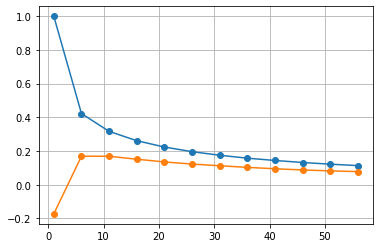

In [115]:
plt.plot(komsu_sayilari, vld.cv_results_['mean_train_score'], '-o')
plt.plot(komsu_sayilari, vld.cv_results_['mean_test_score'], '-o')
plt.grid()

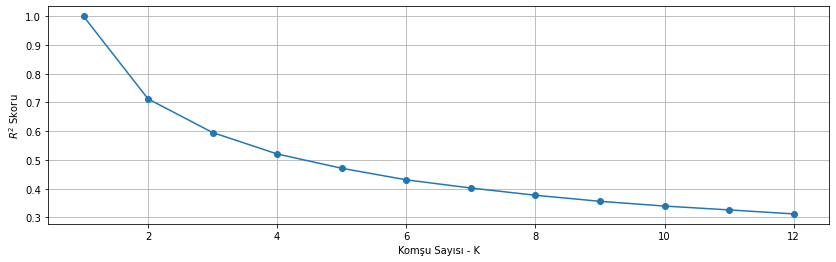

In [116]:
plt.figure(figsize=(14,4))
komsu_sayilari = np.arange(1,13)
skorlar = [neighbors.KNeighborsRegressor(n_neighbors=k).fit(X, y).score(X, y) for k in komsu_sayilari]
plt.plot(komsu_sayilari, skorlar, '-o')
plt.xlabel("Komşu Sayısı - K")
plt.ylabel(r"$R^2$ Skoru")
plt.grid()

## Interpolasyon

Asagidaki sekilde de goruldugu uzere, KNN bir enterpolasyon algoritmasi: datasette gorulmemis olan $y$ degerlerinin cikti olarak gozlemlenmesi imkansiz.

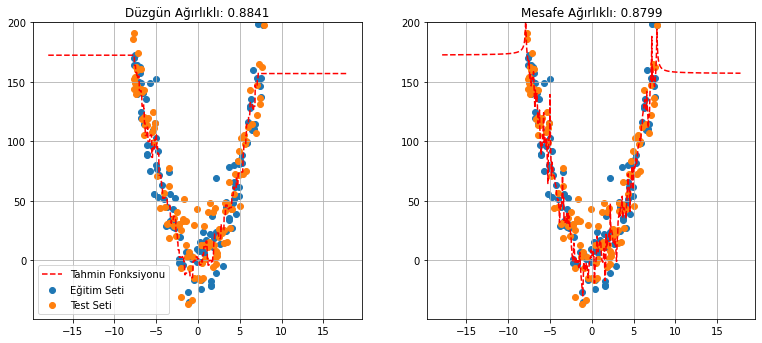

In [118]:
plt.figure(figsize=(20, 12))
a = plt.subplot(231)
plt.scatter(Xlin, ylin, label='Eğitim Seti')
plt.scatter(Xlin_test, ylin_test, label="Test Seti")
t = np.linspace(Xlin.min() - 10, Xlin.max() + 10, 1000)
unif = neighbors.KNeighborsRegressor(n_neighbors=5)
mlin = unif.fit(Xlin, ylin)
plt.plot(t, mlin.predict(t.reshape(-1,1)), color='red', label='Tahmin Fonksiyonu', linestyle='--')
plt.title(f'Düzgün Ağırlıklı: {unif.score(Xlin_test, ylin_test):0.4f}')
plt.legend()
plt.ylim(None, 200)
plt.grid()

plt.subplot(232, sharey=a)
plt.scatter(Xlin, ylin)
plt.scatter(Xlin_test, ylin_test)
t = np.linspace(Xlin.min() - 10, Xlin.max() + 10, 1000)
dist = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
mlin = dist.fit(Xlin, ylin)
plt.plot(t, mlin.predict(t.reshape(-1,1)), color='red', linestyle='--')
plt.title(f'Mesafe Ağırlıklı: {dist.score(Xlin_test, ylin_test):0.4f}')
plt.grid()


# plt.subplot(233, sharey=a)
# plt.scatter(Xlin, ylin)
# plt.scatter(Xlin_test, ylin_test)
# t = np.linspace(Xlin.min() - 10, Xlin.max() + 10, 1000)
# mlin = LocalizedRegressor(n_neighbors=5).fit(Xlin, ylin)
# plt.plot(t, mlin.predict(t.reshape(-1,1)), color='red', linestyle='--')
# plt.title(f'Yerel Ağırlıklı Lineer Regresyon: {mlin.score(Xlin_test, ylin_test):0.4f}')
# plt.grid()

# plt.suptitle('K=5 için farklı tahmin fonksiyonları')

Eldeki X menzilinin ~ [-7, 7] disina cikildiginda tahminlerin sabitlestigini goruyorsunuz.

Bu durumu cozebilecek bir algoritma one surebilir misiniz? (Komsulari bulduktan sonra izlenecek tahmin stratejisini degistirerek)